In [1]:
import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("filtered_parties2.csv", sep = ';')
df

,group,date,source,text_lower,Comment,Обещание,Проверяемость,Конкретность,Выполнение,Тема
0,sprav_ross,2021-09-14,Социальные сети,отменим егэ,🇷🇺 будущее россии в ваших руках! несмотря на м...,1,1,1,0.5,Образование
1,sprav_ross,2021-09-14,Социальные сети,отменим пенсионную реформу,NaN,1,1,1,0.5,Социальная политика
2,sprav_ross,2021-09-14,Социальные сети,увеличим пенсию до 31 тысячи,NaN,1,1,1,0.0,Социальная политика
3,sprav_ross,2021-09-14,Социальные сети,увеличим мрот до 50 тысяч рублей,В апреле 2025 года депутаты СРЗП внесли законо...,1,1,1,0.5,Социальная политика
4,sprav_ross,2021-09-14,Социальные сети,Введем справедливый базовый доход по праву рож...,NaN,1,1,1,0.5,Социальная политика
...,...,...,...,...,...,...,...,...,...,...
265,sprav_ross,2021-06-26,Программа партии,приравнивание коррупции и расхищения государст...,NaN,1,1,1,0.0,Правопорядок и безопасность
266,sprav_ross,2021-06-26,Программа партии,"поддержка предприятий, использующих зелёную ...",NaN,1,1,0,0.5,Экология
267,sprav_ross,2021-06-26,Программа партии,запрет на вывоз леса-кругляка за пределы россии,NaN,1,1,1,1.0,Экология
268,sprav_ross,NaN,Программа партии,возврат гражданам утерянных вкладов сбербанка ...,Предложила механизм и не поддержит законопроек...,1,1,1,0.5,Экономика и инфраструктура


In [3]:
df['Выполнение_cat'] = pd.Categorical(df['Выполнение'], categories=[0, 0.5, 1], ordered=True)

y = df['Выполнение_cat'].cat.codes

In [5]:
numerical_features = ['Конкретность']
categorical_features = ['Тема']

df['group_ЕР_binary'] = (df['group'] == 'ЕР').astype(int)

X_num = df[numerical_features].fillna(df[numerical_features].mean())
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num_scaled, columns=numerical_features)

X_cat = pd.get_dummies(df[categorical_features], drop_first=True)

X = pd.concat([X_num, X_cat, df['group_ЕР_binary']], axis=1)

X = X.astype(float)
y = df['Выполнение_cat']

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.876713
         Iterations: 94
         Function evaluations: 95
         Gradient evaluations: 95
                             OrderedModel Results                             
Dep. Variable:         Выполнение_cat   Log-Likelihood:                -236.71
Model:                   OrderedModel   AIC:                             501.4
Method:            Maximum Likelihood   BIC:                             551.8
Date:                Tue, 10 Jun 2025                                         
Time:                        01:29:52                                         
No. Observations:                 270                                         
Df Residuals:                     256                                         
Df Model:                          12                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------

In [7]:
numerical_features = ['Конкретность']

df['source_binary'] = df['source'].apply(lambda x: 1 if x == 'Программа партии' else 0)

categorical_features = ['Тема', 'group']

X_num = df[numerical_features].fillna(df[numerical_features].mean())
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num_scaled, columns=numerical_features)

X_source = df[['source_binary']]

X_cat = pd.get_dummies(df[categorical_features], drop_first=True)

X = pd.concat([X_num, X_source, X_cat], axis=1)

X = X.astype(float)
y = df['Выполнение_cat']

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.861150
         Iterations: 119
         Function evaluations: 120
         Gradient evaluations: 120
                             OrderedModel Results                             
Dep. Variable:         Выполнение_cat   Log-Likelihood:                -232.51
Model:                   OrderedModel   AIC:                             501.0
Method:            Maximum Likelihood   BIC:                             565.8
Date:                Tue, 10 Jun 2025                                         
Time:                        01:33:23                                         
No. Observations:                 270                                         
Df Residuals:                     252                                         
Df Model:                          16                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------

In [8]:
df

,group,date,source,text_lower,Comment,Обещание,Проверяемость,Конкретность,Выполнение,Тема,Выполнение_cat,group_ЕР_binary,source_binary
0,sprav_ross,2021-09-14,Социальные сети,отменим егэ,🇷🇺 будущее россии в ваших руках! несмотря на м...,1,1,1,0.5,Образование,0.5,0,0
1,sprav_ross,2021-09-14,Социальные сети,отменим пенсионную реформу,NaN,1,1,1,0.5,Социальная политика,0.5,0,0
2,sprav_ross,2021-09-14,Социальные сети,увеличим пенсию до 31 тысячи,NaN,1,1,1,0.0,Социальная политика,0.0,0,0
3,sprav_ross,2021-09-14,Социальные сети,увеличим мрот до 50 тысяч рублей,В апреле 2025 года депутаты СРЗП внесли законо...,1,1,1,0.5,Социальная политика,0.5,0,0
4,sprav_ross,2021-09-14,Социальные сети,Введем справедливый базовый доход по праву рож...,NaN,1,1,1,0.5,Социальная политика,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,sprav_ross,2021-06-26,Программа партии,приравнивание коррупции и расхищения государст...,NaN,1,1,1,0.0,Правопорядок и безопасность,0.0,0,1
266,sprav_ross,2021-06-26,Программа партии,"поддержка предприятий, использующих зелёную ...",NaN,1,1,0,0.5,Экология,0.5,0,1
267,sprav_ross,2021-06-26,Программа партии,запрет на вывоз леса-кругляка за пределы россии,NaN,1,1,1,1.0,Экология,1.0,0,1
268,sprav_ross,NaN,Программа партии,возврат гражданам утерянных вкладов сбербанка ...,Предложила механизм и не поддержит законопроек...,1,1,1,0.5,Экономика и инфраструктура,0.5,0,1


In [12]:
df['group_binary'] = df['group'].apply(lambda x: 1 if x == 'ЕР' else 0)

categorical_features = ['Тема'] 

X_num = df[numerical_features].fillna(df[numerical_features].mean())
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num_scaled, columns=numerical_features)

X_bin = df[['source_binary', 'group_binary']]

X_cat = pd.get_dummies(df[categorical_features], drop_first=True)

X = pd.concat([X_num, X_bin, X_cat], axis=1)


X = X.astype(float)

y = df['Выполнение_cat']

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.869321
         Iterations: 105
         Function evaluations: 106
         Gradient evaluations: 106
                             OrderedModel Results                             
Dep. Variable:         Выполнение_cat   Log-Likelihood:                -234.72
Model:                   OrderedModel   AIC:                             499.4
Method:            Maximum Likelihood   BIC:                             553.4
Date:                Tue, 10 Jun 2025                                         
Time:                        01:40:12                                         
No. Observations:                 270                                         
Df Residuals:                     255                                         
Df Model:                          13                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------

In [13]:
df

,group,date,source,text_lower,Comment,Обещание,Проверяемость,Конкретность,Выполнение,Тема,Выполнение_cat,group_ЕР_binary,source_binary,group_binary
0,sprav_ross,2021-09-14,Социальные сети,отменим егэ,🇷🇺 будущее россии в ваших руках! несмотря на м...,1,1,1,0.5,Образование,0.5,0,0,0
1,sprav_ross,2021-09-14,Социальные сети,отменим пенсионную реформу,NaN,1,1,1,0.5,Социальная политика,0.5,0,0,0
2,sprav_ross,2021-09-14,Социальные сети,увеличим пенсию до 31 тысячи,NaN,1,1,1,0.0,Социальная политика,0.0,0,0,0
3,sprav_ross,2021-09-14,Социальные сети,увеличим мрот до 50 тысяч рублей,В апреле 2025 года депутаты СРЗП внесли законо...,1,1,1,0.5,Социальная политика,0.5,0,0,0
4,sprav_ross,2021-09-14,Социальные сети,Введем справедливый базовый доход по праву рож...,NaN,1,1,1,0.5,Социальная политика,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,sprav_ross,2021-06-26,Программа партии,приравнивание коррупции и расхищения государст...,NaN,1,1,1,0.0,Правопорядок и безопасность,0.0,0,1,0
266,sprav_ross,2021-06-26,Программа партии,"поддержка предприятий, использующих зелёную ...",NaN,1,1,0,0.5,Экология,0.5,0,1,0
267,sprav_ross,2021-06-26,Программа партии,запрет на вывоз леса-кругляка за пределы россии,NaN,1,1,1,1.0,Экология,1.0,0,1,0
268,sprav_ross,NaN,Программа партии,возврат гражданам утерянных вкладов сбербанка ...,Предложила механизм и не поддержит законопроек...,1,1,1,0.5,Экономика и инфраструктура,0.5,0,1,0


In [14]:
print(res.params)

Конкретность                        0.351411
source_binary                      -0.547733
group_binary                        2.547913
Тема_Образование                   -1.995517
Тема_Политическое устройство       -1.807689
Тема_Правопорядок и безопасность   -0.913924
Тема_Развитие села                  9.899754
Тема_Региональная политика         -1.544655
Тема_Социальная политика           -1.143614
Тема_Труд и занятость              -0.582365
Тема_Цифровизация                   0.241117
Тема_Экология                      -0.021904
Тема_Экономика и инфраструктура    -1.253261
0.0/0.5                            -1.788958
0.5/1.0                             0.606206
dtype: float64


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            Variable       VIF
0                       Конкретность  1.071320
1                      source_binary  1.982654
2                       group_binary  1.771613
3                   Тема_Образование  1.102820
4       Тема_Политическое устройство  1.084306
5   Тема_Правопорядок и безопасность  1.201391
6                 Тема_Развитие села  1.192870
7         Тема_Региональная политика  1.117581
8           Тема_Социальная политика  1.245856
9              Тема_Труд и занятость  1.053265
10                 Тема_Цифровизация  1.102403
11                     Тема_Экология  1.169626
12   Тема_Экономика и инфраструктура  1.100984


In [22]:
conditions = [
    df['Выполнение'] == 0,
    df['Выполнение'] == 0.5,
    df['Выполнение'] == 1
]
choices = ['Не выполнено', 'Частично выполнено', 'Выполнено']
df['Выполнение_label'] = pd.Categorical(
    np.select(conditions, choices, default='Неизвестно'),
    categories=['Не выполнено', 'Частично выполнено', 'Выполнено'],
    ordered=True
)

performance_all = df['Выполнение_label'].value_counts().sort_index()
percentage_all = (df['Выполнение_label'].value_counts(normalize=True).sort_index() * 100)

summary_all = pd.DataFrame({
    'Количество': performance_all,
    'Процент': percentage_all
}).round(1)

print("Распределение по выполнению для всех партий:")
print(summary_all)

Распределение по выполнению для всех партий:
                    Количество  Процент
Выполнение_label                       
Не выполнено                78     28.9
Частично выполнено          85     31.5
Выполнено                  107     39.6


In [26]:
df['is_ЕР'] = df['group'].apply(lambda x: 'Единая Россия' if x == 'ЕР' else 'Другие партии')

performance_group = df.groupby(['is_ЕР', 'Выполнение_label']).size().unstack()
percentage_group = df.groupby('is_ЕР')['Выполнение_label'].value_counts(normalize=True).unstack() * 100

print("\nРаспределение по выполнению для ЕР и других партий:")
print(pd.concat([
    performance_group, 
    percentage_group.round(1)
], axis=1, keys=['Количество', 'Процент']))


Распределение по выполнению для ЕР и других партий:
                   Количество                                   Процент  \
Выполнение_label Не выполнено Частично выполнено Выполнено Не выполнено   
is_ЕР                                                                     
Другие партии              69                 78        37         37.5   
Единая Россия               9                  7        70         10.5   

                                               
Выполнение_label Частично выполнено Выполнено  
is_ЕР                                          
Другие партии                  42.4      20.1  
Единая Россия                   8.1      81.4  


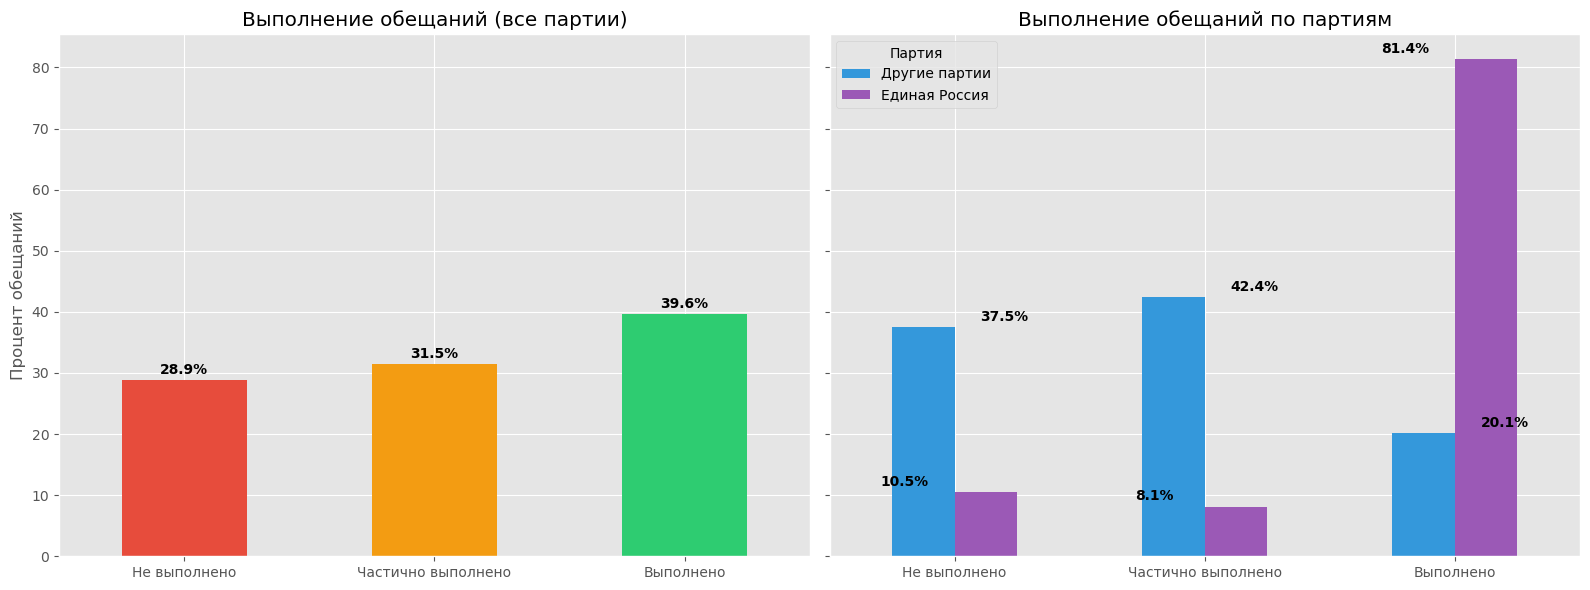

In [27]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

summary_all['Процент'].plot(
    kind='bar', 
    color=['#e74c3c', '#f39c12', '#2ecc71'],
    ax=ax1,
    title='Выполнение обещаний (все партии)',
    xlabel='',
    ylabel='Процент обещаний'
)
ax1.set_xticklabels(summary_all.index, rotation=0)

for i, v in enumerate(summary_all['Процент']):
    ax1.text(i, v + 1, f'{v}%', ha='center', fontweight='bold')

percentage_group.T.plot(
    kind='bar',
    color=['#3498db', '#9b59b6'],
    ax=ax2,
    title='Выполнение обещаний по партиям',
    xlabel=''
)
ax2.legend(title='Партия')
ax2.set_xticklabels(percentage_group.columns, rotation=0)

for i, party in enumerate(percentage_group.index):
    for j, status in enumerate(percentage_group.columns):
        value = percentage_group.loc[party, status]
        if not pd.isna(value):
            ax2.text(j + (-0.2 if party == 'Единая Россия' else 0.2), 
                     value + 1, 
                     f'{value:.1f}%', 
                     ha='center',
                     fontweight='bold')

plt.tight_layout()
plt.savefig('performance_analysis.png', dpi=300)
plt.show()

In [28]:
print(res.summary())

                             OrderedModel Results                             
Dep. Variable:         Выполнение_cat   Log-Likelihood:                -234.72
Model:                   OrderedModel   AIC:                             499.4
Method:            Maximum Likelihood   BIC:                             553.4
Date:                Tue, 10 Jun 2025                                         
Time:                        19:01:01                                         
No. Observations:                 270                                         
Df Residuals:                     255                                         
Df Model:                          13                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Конкретность                         0.3514      0.132      2.654      0.008       0.09

In [31]:
theme_cols = [col for col in X.columns if col.startswith('Тема_')]
theme_indices = [list(X.columns).index(col) for col in theme_cols]

R_matrix = np.zeros((len(theme_indices), len(res.params)))
for i, idx in enumerate(theme_indices):
    R_matrix[i, idx] = 1

wald_test_result = res.wald_test(R_matrix)
print(f"Тест Вальда для тем: \nChi2 = {wald_test_result.statistic}, \np-value = {wald_test_result.pvalue}")

Тест Вальда для тем: 
Chi2 = [[20.2174804]], 
p-value = 0.027261510401346844


In [33]:
from scipy.stats import chi2

def lr_test(restricted_model, full_model):
    LR = 2 * (full_model.llf - restricted_model.llf)
    df = full_model.df_model - restricted_model.df_model
    p_value = chi2.sf(LR, df)
    return LR, p_value, df

X_no_theme = X.drop(columns=theme_cols)
model_no_theme = OrderedModel(y, X_no_theme, distr='logit')
res_no_theme = model_no_theme.fit(method='bfgs', disp=False)

lr_stat, p_value, df_diff = lr_test(res_no_theme, res)
print(f"\nLikelihood Ratio Test: \nChi2({df_diff}) = {lr_stat:.4f}, p = {p_value:.4f}")


Likelihood Ratio Test: 
Chi2(10) = 26.3093, p = 0.0033


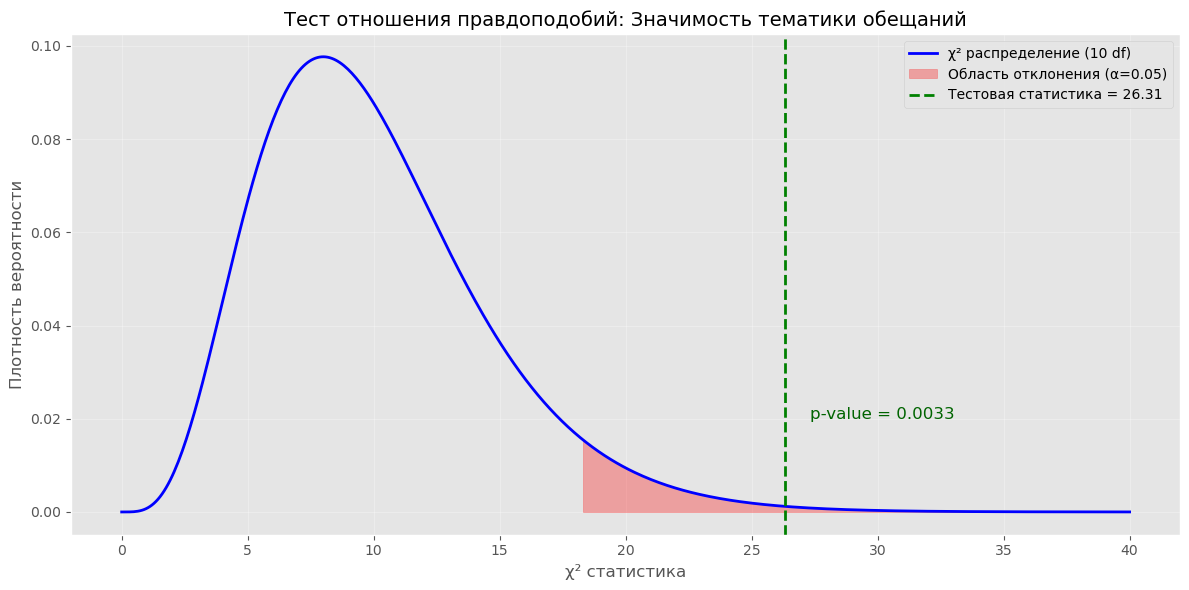

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 10
chi2_stat = 26.3093
p_value = 0.0033

critical_value = chi2.ppf(0.95, df)

x = np.linspace(0, 40, 500)
y = chi2.pdf(x, df)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-', lw=2, label=f'χ² распределение ({df} df)')

x_fill = np.linspace(critical_value, 40, 100)
y_fill = chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='Область отклонения (α=0.05)')

plt.axvline(chi2_stat, color='green', linestyle='--', lw=2, label=f'Тестовая статистика = {chi2_stat:.2f}')
plt.text(chi2_stat + 1, 0.02, f'p-value = {p_value:.4f}', fontsize=12, color='darkgreen')

plt.title('Тест отношения правдоподобий: Значимость тематики обещаний', fontsize=14)
plt.xlabel('χ² статистика', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

In [44]:
from scipy import stats

params = res.params
conf_int = res.conf_int()

predictor_names = [name for name in params.index if not name.startswith("0.")]
coefs = params[predictor_names]
conf_int_pred = conf_int.loc[predictor_names]

odds_ratios = np.exp(coefs)
conf_int_low = np.exp(conf_int_pred[0])
conf_int_high = np.exp(conf_int_pred[1])

or_table = pd.DataFrame({
    'OR': odds_ratios,
    '2.5%': conf_int_low,
    '97.5%': conf_int_high
}).round(3)

print("Отношения шансов (OR) с 95% доверительными интервалами:")
print(or_table)

Отношения шансов (OR) с 95% доверительными интервалами:
                                         OR   2.5%          97.5%
Конкретность                          1.421  1.096   1.842000e+00
source_binary                         0.578  0.337   9.930000e-01
group_binary                         12.780  6.225   2.624100e+01
Тема_Образование                      0.136  0.044   4.230000e-01
Тема_Политическое устройство          0.164  0.034   7.880000e-01
Тема_Правопорядок и безопасность      0.401  0.125   1.289000e+00
Тема_Развитие села                19925.468  0.000  8.912546e+120
Тема_Региональная политика            0.213  0.038   1.197000e+00
Тема_Социальная политика              0.319  0.120   8.460000e-01
Тема_Труд и занятость                 0.559  0.140   2.235000e+00
Тема_Цифровизация                     1.273  0.181   8.936000e+00
Тема_Экология                         0.978  0.251   3.813000e+00
Тема_Экономика и инфраструктура       0.286  0.106   7.720000e-01


In [45]:
predicted_probs = res.predict()
predicted_df = pd.DataFrame(predicted_probs, columns=['Не выполнено', 'Частично', 'Выполнено'])

print("\nОписательные статистики предсказанных вероятностей:")
print(predicted_df.describe().round(3))

print("\nПервые 10 предсказаний:")
print(predicted_df.head(10).round(3))


Описательные статистики предсказанных вероятностей:
       Не выполнено  Частично  Выполнено
count       270.000   270.000    270.000
mean          0.284     0.311      0.405
std           0.207     0.125      0.292
min           0.000     0.000      0.043
25%           0.075     0.227      0.158
50%           0.306     0.354      0.267
75%           0.459     0.414      0.665
max           0.781     0.428      1.000

Первые 10 предсказаний:
   Не выполнено  Частично  Выполнено
0         0.508     0.358      0.134
1         0.306     0.428      0.267
2         0.306     0.428      0.267
3         0.306     0.428      0.267
4         0.306     0.428      0.267
5         0.542     0.339      0.119
6         0.259     0.427      0.314
7         0.306     0.428      0.267
8         0.306     0.428      0.267
9         0.306     0.428      0.267


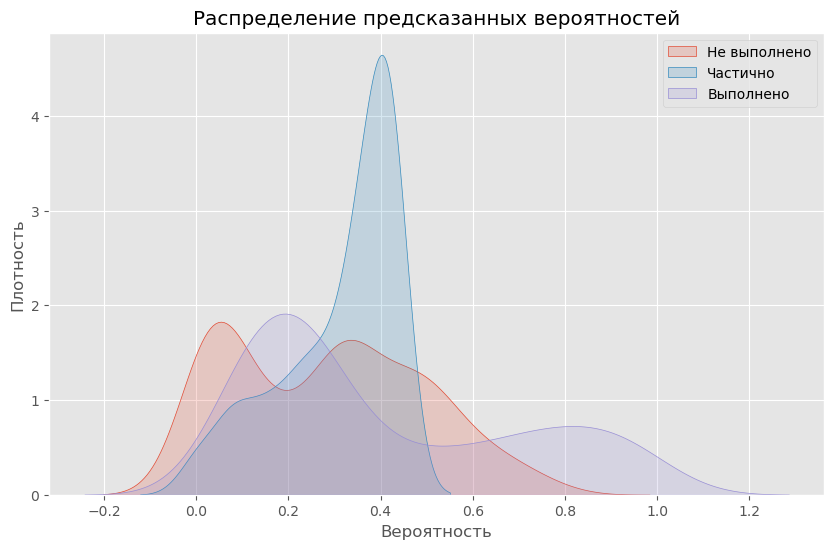

In [47]:
import seaborn as sns
plt.figure(figsize=(10, 6))
for col in predicted_df.columns:
    sns.kdeplot(predicted_df[col], label=col, fill=True, alpha=0.2)

plt.title('Распределение предсказанных вероятностей')
plt.xlabel('Вероятность')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()